In [1]:
import numpy as np

from traffic.core import Traffic
from matplotlib import pyplot as plt
from functions.data_filtering import complete_flight_filter
from functions.data_processing import get_takeoff_and_landing_directions
from functions.data_loading import get_filtered_data_range
from datetime import datetime

In [2]:
origin = "bergen"
destination = "oslo"
filtered_flights: Traffic = get_filtered_data_range(origin, destination, datetime(year=2023, month=1, day=1), datetime(year=2024, month=1, day=1), complete_flight_filter(origin, destination))

In [4]:
filtered_flights

,,count
icao24,callsign,
47875a,NOZ605,30260
478dd9,AKK2,29821
47875c,NOZ601,24104
47a05e,NOZ605,23048
4ac958,SAS252,22801
4ac9ec,SAS238,22763
4acaa3,SAS78A,21955
47875a,NOZ601,21791
47a31a,NOZ605,20963


In [5]:
filtered_flights[0].map_leaflet()

Map(center=[60.34581268473186, 8.448060047183947], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [6]:
directions = list(get_takeoff_and_landing_directions(filtered_flights))
start = [start for start, _ in directions]
end = [end for _, end in directions] 

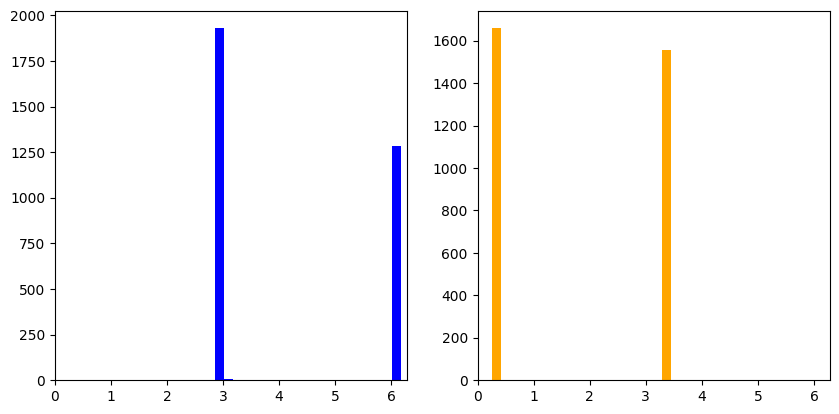

In [7]:
fig, ax = plt.subplots(ncols=2)
ax[0].hist(start, bins=20, color="blue")
ax[0].set_xlim([0, 2*np.pi])
ax[1].hist(end, bins=20, color="orange")
ax[1].set_xlim([0, 2*np.pi])
fig.set_figwidth(10)
plt.show()

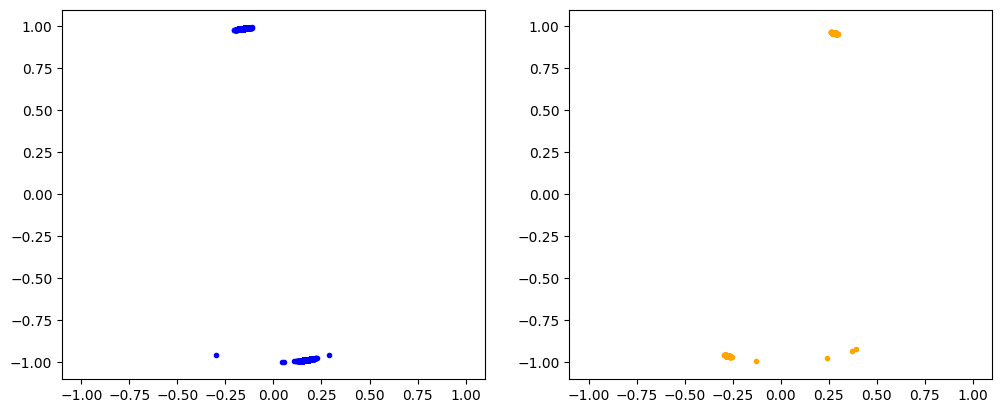

In [8]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.sin(start), np.cos(start), '.', color="blue")
ax[0].set_xlim([-1.1, 1.1])
ax[0].set_ylim([-1.1, 1.1])
ax[1].plot(np.sin(end), np.cos(end), '.', color="orange")
ax[1].set_xlim([-1.1, 1.1])
ax[1].set_ylim([-1.1, 1.1])
fig.set_figwidth(12)
plt.show()

In [9]:
first_30_sec = filtered_flights[200].last('30 sec')

direction = first_30_sec.data.get(['heading']).median().values[0]
print(direction)
first_30_sec.map_leaflet(zoom=13)


195.94539590092288


Map(center=[60.22688446044922, 11.097911966258076], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [10]:
i = 0
for start, end in directions:
    if np.sin(end) > 0.75:
        print(i)
    i += 1

In [11]:
filtered_flights[2867].last('5 sec').data

,timestamp,icao24,latitude,longitude,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,serials,hour
13377001,2023-10-20 19:04:53+00:00,4acaa2,60.169006,11.103863,61.408756,15.549804,-3.25120,SAS2290,False,False,False,None,220.98,297.18,1.697829e+09,1.697829e+09,[-1408233889],2023-10-20 19:00:00+00:00
13377002,2023-10-20 19:04:54+00:00,4acaa2,60.169559,11.104235,61.904524,15.422161,-3.57632,SAS2290,False,False,False,None,220.98,297.18,1.697829e+09,1.697829e+09,[-1408233889],2023-10-20 19:00:00+00:00
13377003,2023-10-20 19:04:55+00:00,4acaa2,60.169838,11.104333,61.904524,15.422161,-3.57632,SAS2290,False,False,False,None,220.98,304.80,1.697829e+09,1.697829e+09,[-1408233889],2023-10-20 19:00:00+00:00
13377004,2023-10-20 19:04:56+00:00,4acaa2,60.169838,11.104333,61.904524,15.422161,-3.57632,SAS2290,False,False,False,None,220.98,304.80,1.697829e+09,1.697829e+09,[-1408233889],2023-10-20 19:00:00+00:00
13377005,2023-10-20 19:04:57+00:00,4acaa2,60.171235,11.105118,62.538281,15.751174,-2.92608,SAS2290,False,False,False,None,205.74,297.18,1.697829e+09,1.697829e+09,[-1408233889],2023-10-20 19:00:00+00:00


In [12]:
np.sin(196.113418 * np.pi / 180)

-0.2775396489124202

In [13]:
for flight in filtered_flights:
    direction = flight.last('5 sec').data.get(['heading']).median().values[0]
    if np.sin(direction * np.pi / 180) > 0.75:
        print(flight)